In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import lightkurve as lk

In [2]:
TIC = 'TIC 332534326'

In [3]:
available_data_select = lk.search_lightcurve(TIC, author="TESS-SPOC", exptime=600)

lc_collection = available_data_select.download_all().stitch()

<IPython.core.display.Javascript object>


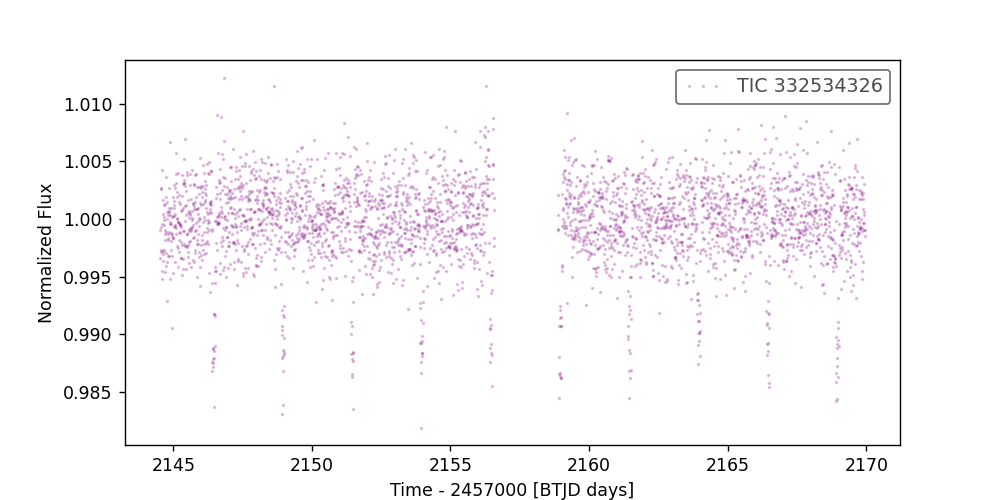

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

In [4]:
# plot the figure
fig, ax = plt.subplots(figsize = (8,4))

lc_collection.plot(ax = ax, linewidth = 0, marker = 'o', color = 'purple', markersize = 1, alpha = 0.2)

In [5]:
# for known systems you can look these parameters up on ExoFOP (https://exofop.ipac.caltech.edu/tess/)

period  = 2.500141001410014052 # time between transit events (duration of a year on this planet)
t0 = 2116.330957 # time of one of the transit events 

# NOTE: on ExoFOP the T0 is called 'epoch' and you need to subtract 2457000 from the value to get it into the right units!

In [6]:
# use the lightkurve function .fold to phase fold the data (make sure to give it the period and t0)
lc_phased = lc_collection.fold(period = period, epoch_time = t0)

<IPython.core.display.Javascript object>


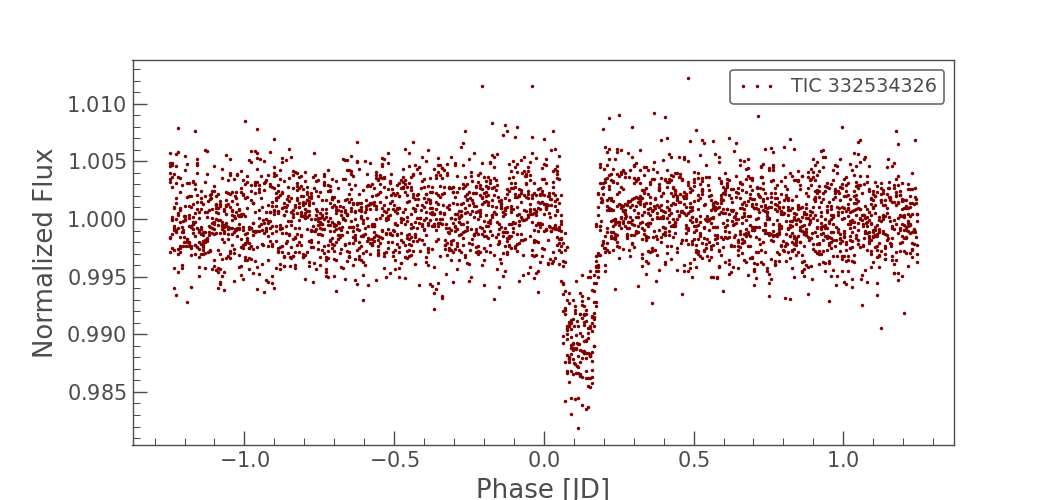

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

In [7]:
# plot the phase folded data (the transit event is at phase = 0 so try zooming in on it to see it better)
lc_phased.plot(linewidth =0, color = 'maroon', marker = '.')

In [8]:
# bin the phase folded data to make the transit more obvious
lc_phased_binned = lc_phased.bin(15/24/60)

<IPython.core.display.Javascript object>


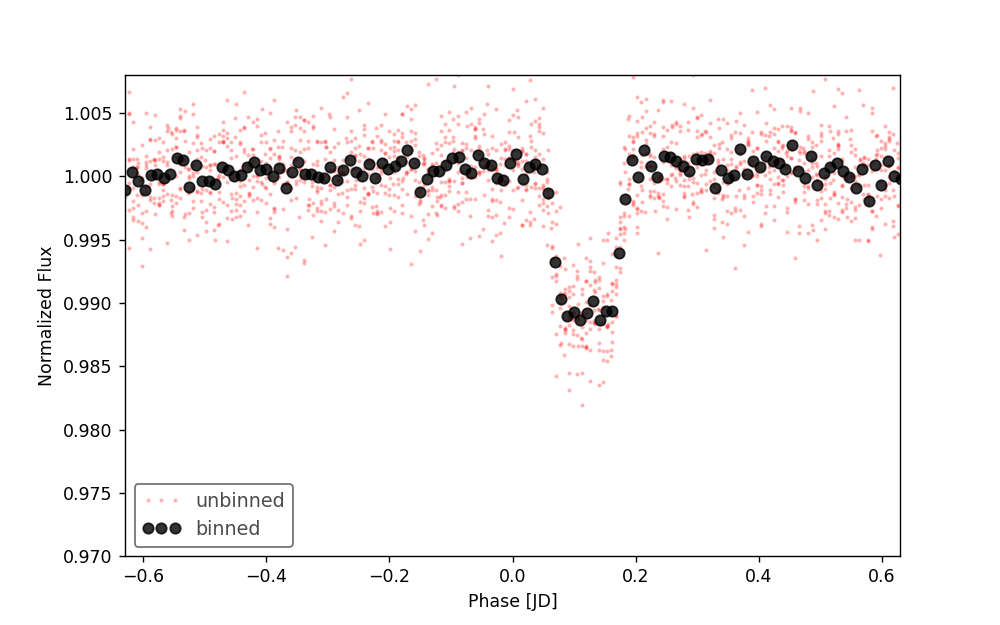

(0.97, 1.008)

In [9]:
# plot both the binned and unbinned data on the same figure

#define a plotting region
fig, ax = plt.subplots(figsize = (8,5))

lc_phased.plot(ax = ax, marker = '.', linewidth = 0, color = 'red', alpha = 0.2, markersize = 3, label = 'unbinned')
lc_phased_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'k', alpha = 0.8, markersize = 6, label = 'binned')

# set x and y axis limits (for different targets these limits will be different)
plt.xlim(-0.63,0.63)
plt.ylim(0.970, 1.008)

<IPython.core.display.Javascript object>


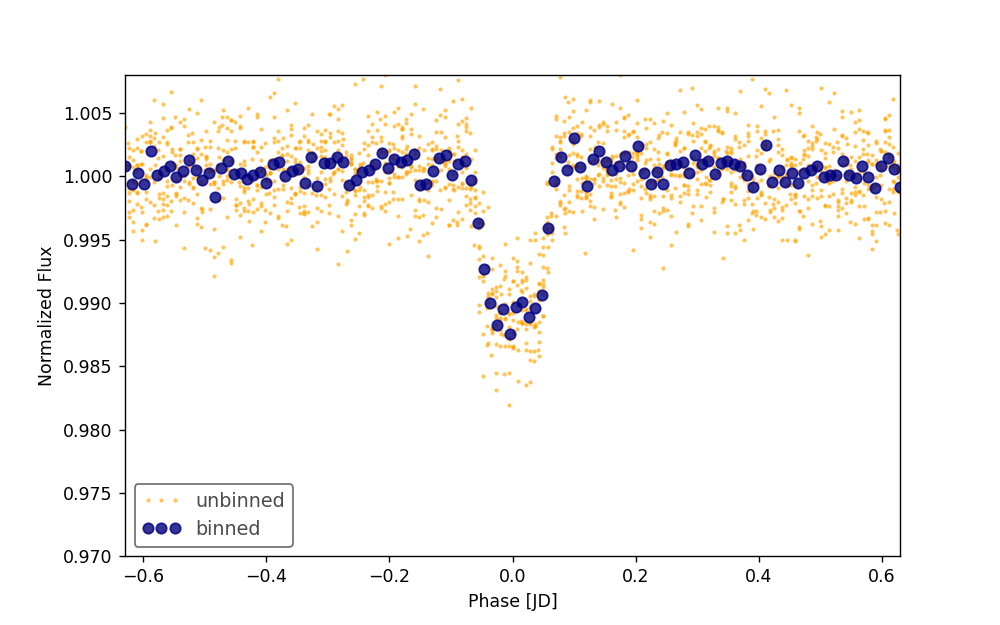

(0.97, 1.008)

In [10]:
TIC = 'TIC 332534326'

sector_data_2 = lk.search_lightcurve(TIC, author="TESS-SPOC", exptime=600)

# normalize the data
lc_2 = sector_data_2.download().normalize()

# define the pre-determined period and t0
period_2 = 2.500141001410014052
t0_2 = 2459146.451004 - 2457000 # this value is from ExoFOP so subtract 2457000 to get it in to the right units

# phase fold
lc_phased_2 = lc_2.fold(period = period_2, epoch_time = t0_2)

# bin the phase folded lightcurve
lc_phased_binned_2 = lc_phased_2.bin(15/24/60)


# --- plot the data ---

fig, ax = plt.subplots(figsize = (8,5))

lc_phased_2.plot(ax = ax, marker = '.', linewidth = 0, color = 'orange', alpha = 0.5, markersize = 3, label = 'unbinned')
lc_phased_binned_2.plot(ax = ax, marker = 'o', linewidth = 0, color = 'navy', alpha = 0.8, markersize = 6, label = 'binned')

# set x and y axis limits (for different targets these limits will be different)
plt.xlim(-0.63,0.63)
plt.ylim(0.970, 1.008)